<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/Semop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
import os
import numpy as np
import pandas as pd
import tempfile
from glob import glob

In [6]:
path = os.getcwd()

try:
    os.chdir(path + "/drive/My Drive/データサイエンティスト講座/")
except:
    pass

os.getcwd()

'/content/drive/My Drive/データサイエンティスト講座'

In [23]:
!pip install semopy
!pip install see

In [34]:
!pip install graphviz

In [40]:
import semopy as sem
from semopy import Model
import semopy

In [9]:
from semopy.examples import political_democracy

data = political_democracy.get_data()
data

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [18]:
data.dtypes

,0
y1,float64
y2,float64
y3,float64
y4,float64
y5,float64
y6,float64
y7,float64
y8,float64
x1,float64
x2,float64


In [12]:
desc = political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [16]:
# 仮説モデルを、変数descに代入する
desc = '''
    # measurement model
    ind60 =~ x1 + x2 + x3
    dem60 =~ y1 + y2 + y3 + y4
    dem65 =~ y5 + y6 + y7 + y8
    # regressions
    dem60 ~ ind60
    dem65 ~ ind60 + dem60
    # residual correlations
    y1 ~~ y5
    y2 ~~ y4 + y6
    y3 ~~ y7
    y4 ~~ y8
    y6 ~~ y8
    '''


In [30]:
mod = Model(desc)
res = mod.fit(data)

print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [31]:
inspect = mod.inspect()
print(inspect)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [33]:
# 適合度を表示する
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


In [37]:
model = Model(desc)
result = model.fit(data)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [38]:
inspect = model.inspect()
print(inspect)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

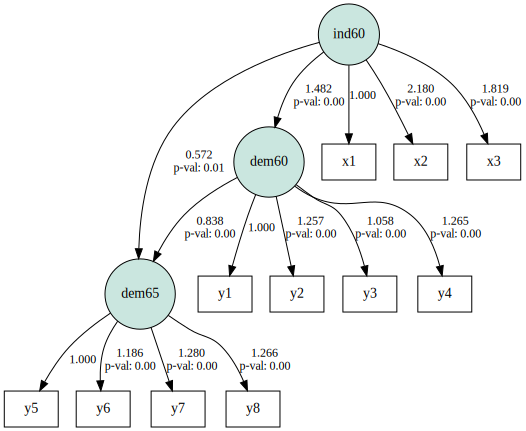

In [39]:
semopy.semplot(model, "graph.png")